In [130]:
import pandas as pd

customers_df = pd.read_csv(
    "Mall_Customers.csv",
)

customers_df = customers_df.rename(
    columns={
        "CustomerID": "customer_id",
        "Genre": "genre",
        "Age": "age",
        "Annual Income (k$)": "annual_income",
        "Spending Score (1-100)": "spending_score",
    }
)

customers_df = customers_df.set_index("customer_id")

customers_df = customers_df.drop(columns=["genre"])

In [131]:
customers_df.head()

,age,annual_income,spending_score
customer_id,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [132]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = customers_df[["annual_income", "spending_score"]].values
# X = pca.fit_transform(X)

In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
customers_kmeans_label = kmeans.fit_predict(X=X)

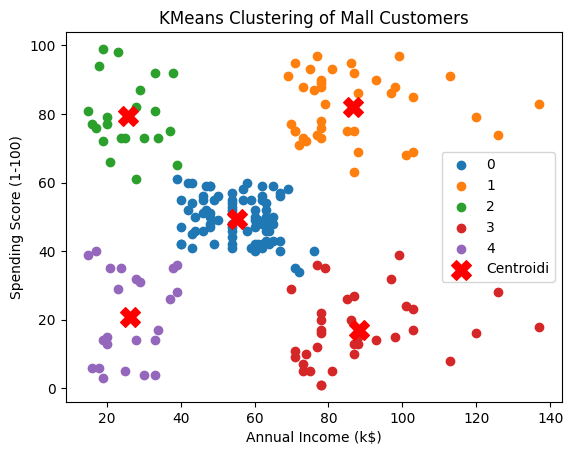

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Getting unique labels

u_labels = np.unique(customers_kmeans_label)
centroids = kmeans.cluster_centers_

# plotting the results:
for i in u_labels:
    plt.scatter(X[customers_kmeans_label == i, 0], X[customers_kmeans_label == i, 1], label=i)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroidi')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.title("KMeans Clustering of Mall Customers")
plt.legend()
plt.show()

Il cluster identificato con clienti che hanno un reddito annuale elevato e un punteggio di spesa alto è il cluster 1

In [135]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5, eps=10.5)
customers_dbscan_label = dbscan.fit_predict(X=X)

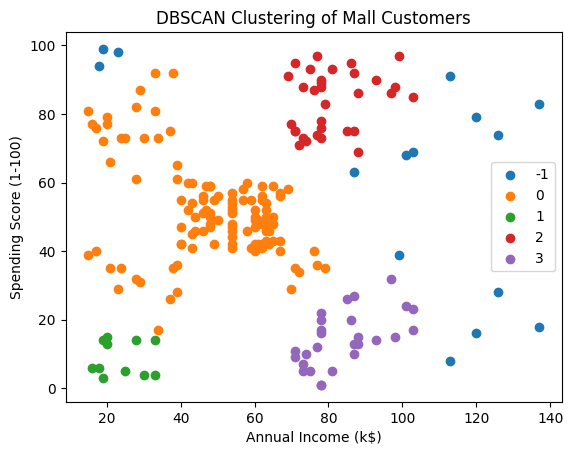

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Getting unique labels

u_labels = np.unique(customers_dbscan_label)
# centroids = dbscan.cluster_centers_

# plotting the results:
for i in u_labels:
    plt.scatter(X[customers_dbscan_label == i, 0], X[customers_dbscan_label == i, 1], label=i)

# plt.scatter(centroids[:, 0], centroids[:, 1], s=80, color="k")

plt.title("DBSCAN Clustering of Mall Customers")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.legend()
plt.show()